In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement/placement_dataset_sample.csv


In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
df=pd.read_csv('/kaggle/input/placement/placement_dataset_sample.csv')
df

,cgpa,placement_exam_marks,placed
0,6.56,60.0,0
1,7.89,39.0,1
2,6.77,75.0,1
3,6.53,46.0,0
4,6.23,31.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  5 non-null      float64
 1   placement_exam_marks  5 non-null      float64
 2   placed                5 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 252.0 bytes


In [9]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [10]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
x

array([6.56, 7.89, 6.77, 6.53, 6.23])

In [5]:
y

array([60., 39., 75., 46., 31.])

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train.shape)


(4,)


In [16]:
x_train.shape[0]

4

In [19]:
x_train[0]

6.23

In [20]:
x_train.mean()

6.8025

In [21]:
x_test[0]

6.77

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
LinearRegression()
x_train.reshape(1,-1)

array([[6.23, 7.89, 6.53, 6.56]])

In [25]:
lr.predict(x_test.reshape(-1,1))

array([[44.04785592]])

In [26]:
y_test

array([75.])

In [30]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'HDD': ['1TB', '512GB', '2TB', 'None', np.nan],
    'SSD': ['256GB', '1TB', '512GB', '128GB', np.nan]
})

    try:
        if pd.isnull(value):
            return np.nan
        value = str(value)
        num = int(''.join(filter(str.isdigit, value)))
        if "TB" in value.upper():
            return num * 1000
        else:
            return num
    except Exception as e: 
        print(f"Error processing value {value}: {e}")
        return np.nan

data['HDD'] = data['HDD'].apply(TBtoGB)
data['SSD'] = data['SSD'].apply(TBtoGB)

print(data)


Error processing value None: invalid literal for int() with base 10: ''
      HDD     SSD
0  1000.0   256.0
1   512.0  1000.0
2  2000.0   512.0
3     NaN   128.0
4     NaN     NaN


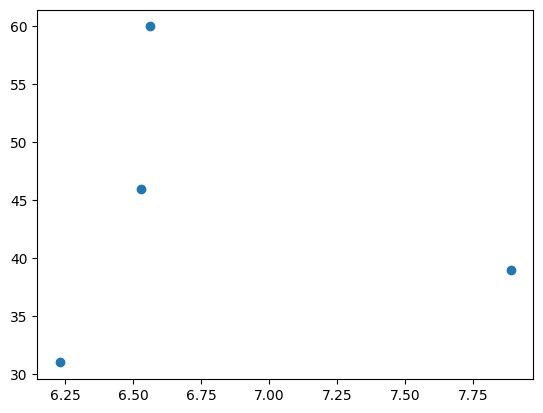

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=x_train, y=y_train)
plt.show()


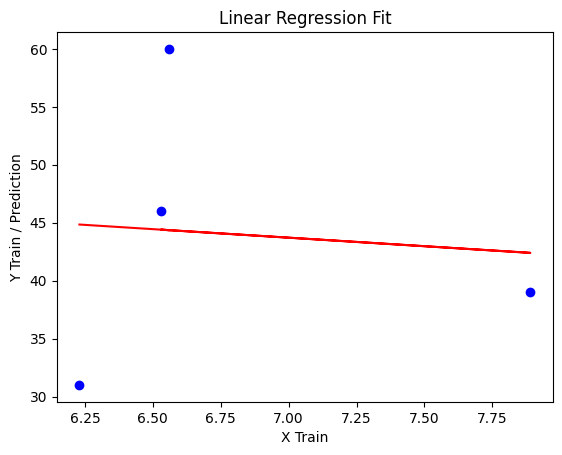

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train.reshape(-1, 1)), color='red')
plt.xlabel("X Train")
plt.ylabel("Y Train / Prediction")
plt.title("Linear Regression Fit")
plt.show()

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df = pd.read_csv('/kaggle/input/placement/placement_dataset_sample.csv')
print(df.columns)
X = df[['cgpa']]

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')


In [44]:
X = df[['cgpa', 'placement_exam_marks']]
y = df['placed']


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


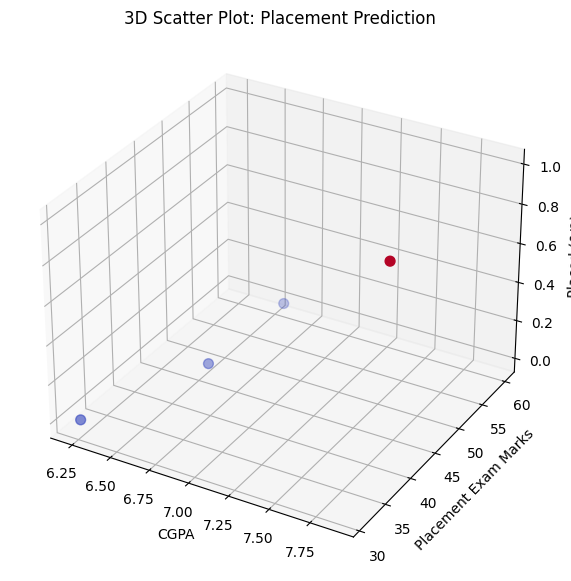

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train['cgpa'], x_train['placement_exam_marks'], y_train, c=y_train, cmap='coolwarm', s=50)

ax.set_xlabel('CGPA')
ax.set_ylabel('Placement Exam Marks')
ax.set_zlabel('Placed (0/1)')
ax.set_title('3D Scatter Plot: Placement Prediction')
plt.show()
